In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches
from tqdm import tqdm
import matplotlib as mpl
import os
import seaborn as sns
from collections import defaultdict
from matplotlib.font_manager import FontProperties
import matplotlib.ticker as ticker

continent_month_files = "../../data/input/continent_month_split/"
scatter_figures_output = "../../data/output/plots/scatter_figures/"
bounds_file_path = "../../data/input/genome_list.tsv"

def get_en_font():
    font = FontProperties()
    font.set_family('serif')
    font.set_name('Times New Roman')
    return font

en_font = get_en_font()

# 设置图表正常显示中文
plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams["font.style"] = "normal"
plt.rcParams["axes.unicode_minus"]=False

print("read data from genome_list.tsv")
data = pd.read_csv(bounds_file_path, sep="\t", header=None,names=['id', 'proteinName', 'gene', 'index'])
bounds = [1]
legend_labels = ["orf1a","orf1b"]
labels = ["5'UTR","orf1a","orf1b","NCR"]
for row_index, row in data.iterrows():
    if row["gene"] == "orf1ab":
        temp = row["index"].split(",")
        for item in temp:
            index_list = item.split("..")
            for index in index_list:
                if int(index) not in bounds:
                    bounds.append(int(index))
    else:
        legend_labels.append(row["gene"])
        labels.append(row["gene"])
        if row["gene"] == "ORF10":
            labels.append("3'UTR")
        else:
            labels.append("NCR")
        temp = row["index"].split("..")
        for item in temp:
            if int(item) not in bounds:
                bounds.append(int(item))
bounds.append(30000)
colors = ['white', '#63b2ee','#76da91','white','#f8cb7f','white','#f89588','white','#7cd6cf','white','#9192ab','white','#7898e1','white', '#efa666', 'white','#eddd86','white','#9987ce','white', '#63b2ee', 'white']
legend_colors = [c for c in colors if c != "white"]
print(bounds,len(bounds), labels, len(labels), len(legend_colors))

colors_dict = {
    0:colors[0:2],
    1:['#63b2ee'],
    2:['#63b2ee','#76da91'],
    3:['#76da91'],
    4:['#76da91','white','#f8cb7f'],
    5:['#f8cb7f','white','#f89588','white','#7cd6cf','white','#9192ab','white','#7898e1','white', '#efa666', 'white','#eddd86','white','#9987ce','white', '#63b2ee', 'white']
}

bounds_dict = {
    0:[1, 266, 5000],
    1:[5001, 10000],
    2:[10001, 13468, 15000],
    3:[15001, 20000],
    4:[20001, 21555, 21563, 25000],
    5:[25001, 25384, 25393, 26220, 26245, 26472, 26523, 27191, 27202, 27387, 27394, 27759, 27894, 28259, 28274, 29533, 29558, 29674, 30000]
}

labels_dict = {
    0:[1, 266, 5000],
    1:[5001, 10000],
    2:[10001, 13468, 15000],
    3:[15001, 20000],
    4:[20001, 21563, 25000],
    5:[25001, 25393, 26245, 26523, 27202, 27394, 27894, 28274, 29558, 30000]
}

legend_labels_dict = {
    0:["ORF1a"],
    1:["ORF1a"],
    2:["ORF1a","ORF1b"],
    3:["ORF1b"],
    4:["ORF1b", "S"],
    5:["S", "ORF3a","E", "M", "ORF6", "ORF7a", "ORF8", "N", "ORF10"]
}

print("reading data grouped by month and continent")
# 声明一个dict类型的空dict
continent_month_dict = defaultdict(lambda : {})
# 声明heatmap的横轴数组(29903bp)
genome_length = [i+1 for i in range(29903)]

splits = os.listdir(continent_month_files)
for split in tqdm(splits):
    print(split)
    # 获取文件名的大洲与月份
    continent, month = split.split(".")[0].split("-")
    month = month[0:4] + "-" + month[4:]
    # 读取文件数据
    data = pd.read_csv(continent_month_files + split, sep="\t")
    # # 将position的类型改为str
    # data["Position"] = data["Position"].astype(str)
    # 计算当月的样本数
    sample_num = len(data["Id"].unique())
    # 计算各个位点的出现个数并按照位点次序排序
    pos_series = data["Position"].value_counts().sort_index()
    # 判断是否存在position=0，如果有就删除该行
    keys = pos_series.keys()
    if 0 in keys:
        pos_series = pos_series.drop(0)
    # print(pos_series)
    pos_fre_series = pos_series / sample_num
    pos_indexs = list(pos_fre_series.keys())
    fre_res = []
    for i in genome_length:
        if i in pos_indexs:
            fre_res.append(round(pos_fre_series[i],2))
        else:
            fre_res.append(0)
    continent_month_dict[continent][month] = list(fre_res)

for continent in tqdm(continent_month_dict):
    print(continent)
    months = []
    heatmap_data = []
    sorted_continent_dict = sorted(continent_month_dict[continent].items(), key=lambda x: x[0]) 
    for month_data in sorted_continent_dict:
        print(month_data[0])
        month = month_data[0]
        months.append(month)
        heatmap_data.append(list(month_data[1]))
        print(len(month_data[1]))
        # months.append(month)
        # 进行热点图作图
    print("Start drawing")
    heatmap_data = np.array(heatmap_data)
    heatmap_data1 = np.array(heatmap_data[:,0:5000])
    heatmap_data2 = np.array(heatmap_data[:,5000:10000])
    heatmap_data3 = np.array(heatmap_data[:,10000:15000])
    heatmap_data4 = np.array(heatmap_data[:,15000:20000])
    heatmap_data5 = np.array(heatmap_data[:,20000:25000])
    heatmap_data6 = np.array(heatmap_data[:,25000:])

    heatmap_data_dict = {
    0:heatmap_data1,
    1:heatmap_data2,
    2:heatmap_data3,
    3:heatmap_data4,
    4:heatmap_data5,
    5:heatmap_data6,
}

    for i in range(6):
        plt.figure(figsize=(45,15))
        grid = plt.GridSpec(15, 45, hspace=0.8, right = 0.8)
        plt.subplot(grid[0:9,0:44])
        ax = sns.heatmap(heatmap_data_dict[i], cmap="PuRd", yticklabels=months, vmin=0,vmax=0.05, cbar=False)
        plt.xticks(ticks = [1,1000, 2000, 3000, 4000,5000],labels=[1+i*5000,1000+i*5000, 2000+i*5000, 3000+i*5000, 4000+i*5000,(1+i)*5000]) 
        ax.set_xticklabels(labels=[1+i*5000,1000+i*5000, 2000+i*5000, 3000+i*5000, 4000+i*5000,(1+i)*5000],fontsize=32, fontproperties=en_font)
        ax.set_yticklabels(labels=months, fontsize=32, fontproperties=en_font)
        ax.tick_params(top=True, bottom=False,
                       labeltop=True, labelbottom=False, labelsize=32)
        plt.setp(ax.get_xticklabels(), rotation=-0, ha="right",
                 rotation_mode="anchor")
        plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
                 rotation_mode="anchor")
        ax = plt.subplot(grid[0:9, 44:])
        # cb=ax.figure.colorbar(ax.collections[0]) #显示colorbar
        # cb.ax.tick_params(labelsize=32) #设置colorbar刻度字体大小
        norm = mpl.colors.Normalize(vmin=0, vmax=0.05)
        cb = plt.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap="PuRd"),
            cax=ax,
            ticks=[0,0.01, 0.02, 0.03, 0.04,0.05]
        )
        cb.ax.tick_params(labelsize=32)
        ax = plt.subplot(grid[9:10,0:44])
        cmap = mpl.colors.ListedColormap(colors_dict[i])
        norm = mpl.colors.BoundaryNorm(bounds_dict[i], cmap.N)
        cbar = plt.colorbar(
            mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
            cax=ax,
            ticks=[],
            spacing='proportional',
            orientation='horizontal',
        )
        # cbar.xticks(ticks=[(j-i*5000) for j in bounds_dict[i]],labels=[str(j) for j in bounds_dict[i]])
        # cbar.ax.tick_params(labelsize=32)
        # plt.setp(cbar.ax.get_xticklabels(), rotation=0, ha="right",
        #  rotation_mode="anchor")

        # cbar.ax.set_xticklabels([str(j) for j in bounds_dict[i]])
        cbar.outline.set_visible(False)
        # create a patch (proxy artist) for every color 
        label_colors = [c for c in colors_dict[i] if c != "white"]
        patches = [ mpatches.Patch(color=label_colors[j], label=legend_labels_dict[i][j]) for j in range(len(label_colors)) ]
        # put those patched as legend-handles into the legend
        # ax = plt.subplot(grid[10:,0:44])
        ncol = len(label_colors)
        lg = ax.legend(handles=patches, fontsize=32,bbox_to_anchor=(0.5,-3),loc=8,borderaxespad = 0.2,ncol=ncol, labelspacing=1 )


        plt.savefig(
        scatter_figures_output + "mutation_region-{}-{}.png".format(continent, i+1),bbox_extra_artists=(lg,),  bbox_inches="tight",dpi=500)
        plt.close()


    # plt.figure(figsize=(45,10))
    # grid = plt.GridSpec(10, 45, hspace=0.8, right = 0.8)
    # plt.subplot(grid[0:9,0:44])
    # ax = sns.heatmap(heatmap_data1, cmap="PuRd", yticklabels=months, vmin=0,vmax=0.05, cbar=False)
    # # plt.xticks(ticks = [1,2500, 5000, 7500, 10000],labels=[1,2500, 5000, 7500, 10000]) 
    # plt.xticks(ticks = [1,500, 1000, 1500, 2000,2500, 5000],labels=[1,500, 1000, 1500, 2000,2500, 5000]) 
    # ax.set_xticklabels(labels=[1,500, 1000, 1500, 2000,2500, 5000],fontsize=32, fontproperties=en_font)
    # ax.set_yticklabels(labels=months, fontsize=32, fontproperties=en_font)
    # ax.tick_params(top=True, bottom=False,
    #                labeltop=True, labelbottom=False, labelsize=32)
    # plt.setp(ax.get_xticklabels(), rotation=-0, ha="right",
    #          rotation_mode="anchor")
    # plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
    #          rotation_mode="anchor")
    
    # ax = plt.subplot(grid[0:9, 44:])
    # # cb=ax.figure.colorbar(ax.collections[0]) #显示colorbar
    # # cb.ax.tick_params(labelsize=32) #设置colorbar刻度字体大小
    # norm = mpl.colors.Normalize(vmin=0, vmax=0.05)
    # cb = plt.colorbar(
    #     mpl.cm.ScalarMappable(norm=norm, cmap="PuRd"),
    #     cax=ax,
    #     ticks=[0,0.01, 0.02, 0.03, 0.04,0.05]
    # )
    # cb.ax.tick_params(labelsize=32)
    
    # ax = plt.subplot(grid[9,0:44])
    # cmap = mpl.colors.ListedColormap(colors_1)
    # norm = mpl.colors.BoundaryNorm(bounds_1, cmap.N)
    # cbar = plt.colorbar(
    #     mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    #     cax=ax,
    #     ticks=[241, 266, 3037, 10000],
    #     spacing='proportional',
    #     orientation='horizontal',
    # )
    # cbar.outline.set_visible(False)
    # cbar.ax.tick_params(labelsize=32)

    # plt.savefig(
    #     scatter_figures_output + "mutation_region-{}-1.png".format(continent), bbox_inches="tight")
    # plt.close()





Duplicate key in file PosixPath('/home/lsh/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 265 ('font.serif:      DejaVu Serif, Bitstream Vera Serif, Computer Modern Roman, New Century Schoolbook, Century Schoolbook L, Utopia, ITC Bookman, Bookman, Nimbus Roman No9 L, Times New Roman, Times, Palatino, Charter, serif')
Duplicate key in file PosixPath('/home/lsh/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 334 ('mathtext.fontset:  stix')


read data from genome_list.tsv
[1, 266, 13468, 21555, 21563, 25384, 25393, 26220, 26245, 26472, 26523, 27191, 27202, 27387, 27394, 27759, 27894, 28259, 28274, 29533, 29558, 29674, 30000] 23 ["5'UTR", 'orf1a', 'orf1b', 'NCR', 'S', 'NCR', 'ORF3a', 'NCR', 'E', 'NCR', 'M', 'NCR', 'ORF6', 'NCR', 'ORF7a', 'NCR', 'ORF8', 'NCR', 'N', 'NCR', 'ORF10', "3'UTR"] 22 11
reading data grouped by month and continent


  1%|█▋                                                                                                                                                                                                    | 1/118 [00:00<00:20,  5.71it/s]

South America-202004.tsv
Europe-202107.tsv


  2%|███▎                                                                                                                                                                                                  | 2/118 [00:04<04:44,  2.45s/it]

South America-202104.tsv


  3%|█████                                                                                                                                                                                                 | 3/118 [00:05<03:27,  1.81s/it]

Europe-202003.tsv


  3%|██████▋                                                                                                                                                                                               | 4/118 [00:06<02:40,  1.41s/it]

North America-202004.tsv


  4%|████████▍                                                                                                                                                                                             | 5/118 [00:06<02:12,  1.17s/it]

South America-202010.tsv


  6%|███████████▋                                                                                                                                                                                          | 7/118 [00:07<01:11,  1.56it/s]

Africa-202102.tsv
South America-202003.tsv


  7%|█████████████▍                                                                                                                                                                                        | 8/118 [00:07<00:51,  2.12it/s]

Oceania-202007.tsv


  8%|███████████████                                                                                                                                                                                       | 9/118 [00:07<00:43,  2.49it/s]

Asia-202007.tsv


  8%|████████████████▋                                                                                                                                                                                    | 10/118 [00:08<00:47,  2.28it/s]

North America-202007.tsv


  9%|██████████████████▎                                                                                                                                                                                  | 11/118 [00:09<01:01,  1.73it/s]

Asia-202105.tsv


 10%|████████████████████                                                                                                                                                                                 | 12/118 [00:10<01:31,  1.16it/s]

Asia-202011.tsv


 11%|█████████████████████▋                                                                                                                                                                               | 13/118 [00:11<01:24,  1.24it/s]

Asia-202006.tsv


 12%|███████████████████████▎                                                                                                                                                                             | 14/118 [00:11<01:13,  1.41it/s]

North America-202104.tsv


 13%|█████████████████████████                                                                                                                                                                            | 15/118 [00:15<02:38,  1.54s/it]

South America-202103.tsv


 14%|██████████████████████████▋                                                                                                                                                                          | 16/118 [00:15<02:09,  1.27s/it]

Europe-202007.tsv


 14%|████████████████████████████▍                                                                                                                                                                        | 17/118 [00:16<01:46,  1.06s/it]

South America-202002.tsv
North America-202108.tsv


 16%|███████████████████████████████▋                                                                                                                                                                     | 19/118 [00:20<02:25,  1.47s/it]

Asia-202009.tsv


 19%|████████████████████████████████████▋                                                                                                                                                                | 22/118 [00:20<01:12,  1.32it/s]

Oceania-202102.tsv
Europe-202002.tsv
Europe-202004.tsv


 19%|██████████████████████████████████████▍                                                                                                                                                              | 23/118 [00:21<01:15,  1.25it/s]

Europe-202012.tsv


 20%|████████████████████████████████████████                                                                                                                                                             | 24/118 [00:24<01:46,  1.13s/it]

Africa-202002.tsv
North America-202003.tsv


 23%|█████████████████████████████████████████████                                                                                                                                                        | 27/118 [00:24<00:59,  1.54it/s]

Africa-202103.tsv
Europe-202009.tsv


 24%|██████████████████████████████████████████████▋                                                                                                                                                      | 28/118 [00:26<01:09,  1.30it/s]

Asia-202104.tsv


 25%|████████████████████████████████████████████████▍                                                                                                                                                    | 29/118 [00:27<01:25,  1.05it/s]

Oceania-202106.tsv
North America-202103.tsv


 27%|█████████████████████████████████████████████████████▍                                                                                                                                               | 32/118 [00:30<01:15,  1.14it/s]

Oceania-202009.tsv
Asia-202101.tsv


 28%|███████████████████████████████████████████████████████                                                                                                                                              | 33/118 [00:31<01:20,  1.05it/s]

South America-202102.tsv


 30%|██████████████████████████████████████████████████████████▍                                                                                                                                          | 35/118 [00:32<00:52,  1.59it/s]

Africa-202006.tsv
South America-202005.tsv


 31%|████████████████████████████████████████████████████████████                                                                                                                                         | 36/118 [00:32<00:41,  1.98it/s]

Asia-202102.tsv


 32%|███████████████████████████████████████████████████████████████▍                                                                                                                                     | 38/118 [00:33<00:40,  1.97it/s]

Africa-202008.tsv
Asia-202005.tsv


 33%|█████████████████████████████████████████████████████████████████                                                                                                                                    | 39/118 [00:33<00:39,  2.00it/s]

North America-202106.tsv


 35%|████████████████████████████████████████████████████████████████████▍                                                                                                                                | 41/118 [00:36<00:57,  1.35it/s]

Africa-202009.tsv
Europe-202101.tsv


 36%|██████████████████████████████████████████████████████████████████████                                                                                                                               | 42/118 [00:39<01:46,  1.40s/it]

Africa-202105.tsv


 38%|███████████████████████████████████████████████████████████████████████████▏                                                                                                                         | 45/118 [00:39<00:44,  1.64it/s]

Africa-202004.tsv
Oceania-202010.tsv
North America-202012.tsv


 39%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                        | 46/118 [00:41<01:02,  1.16it/s]

Africa-202007.tsv


 42%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                                                   | 49/118 [00:41<00:30,  2.28it/s]

Oceania-202006.tsv
Oceania-202011.tsv
Oceania-202108.tsv


 42%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                                                 | 50/118 [00:41<00:25,  2.71it/s]

Asia-202012.tsv


 44%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                                                              | 52/118 [00:42<00:27,  2.44it/s]

Asia-202002.tsv
Africa-202003.tsv
Oceania-202012.tsv


 46%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                          | 54/118 [00:42<00:17,  3.69it/s]

Europe-202103.tsv


 47%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                         | 55/118 [00:47<01:15,  1.19s/it]

Africa-202012.tsv


 48%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                     | 57/118 [00:47<00:46,  1.32it/s]

Oceania-202104.tsv
Africa-202108.tsv


 49%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                    | 58/118 [00:47<00:36,  1.64it/s]

North America-202001.tsv
Oceania-202001.tsv
North America-202101.tsv


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 61/118 [00:50<00:38,  1.49it/s]

Asia-202010.tsv


 53%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 62/118 [00:50<00:35,  1.56it/s]

Asia-202107.tsv


 53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 63/118 [00:51<00:44,  1.24it/s]

South America-202009.tsv


 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 64/118 [00:52<00:36,  1.49it/s]

Europe-202011.tsv


 55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 65/118 [00:54<00:52,  1.01it/s]

Europe-202006.tsv


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                      | 66/118 [00:54<00:47,  1.11it/s]

Asia-202004.tsv


 57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 67/118 [00:55<00:38,  1.31it/s]

North America-202002.tsv
Africa-202101.tsv


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 69/118 [00:55<00:25,  1.96it/s]

South America-202105.tsv


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 70/118 [00:56<00:31,  1.54it/s]

Europe-202105.tsv


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 72/118 [01:00<00:49,  1.07s/it]

Oceania-202101.tsv
North America-202107.tsv


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 73/118 [01:03<01:13,  1.63s/it]

Oceania-202002.tsv
South America-202106.tsv


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 75/118 [01:04<00:49,  1.16s/it]

Africa-202107.tsv


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 76/118 [01:04<00:39,  1.05it/s]

North America-202006.tsv


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 77/118 [01:05<00:37,  1.10it/s]

North America-202008.tsv


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 79/118 [01:06<00:26,  1.47it/s]

Oceania-202103.tsv
Africa-202010.tsv


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 83/118 [01:06<00:09,  3.83it/s]

Asia-202001.tsv
Europe-202001.tsv
Oceania-202005.tsv
South America-202108.tsv
Asia-202106.tsv


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 85/118 [01:09<00:18,  1.78it/s]

North America-202009.tsv


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 86/118 [01:09<00:19,  1.65it/s]

North America-202105.tsv


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 87/118 [01:12<00:33,  1.07s/it]

North America-202010.tsv


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 88/118 [01:13<00:31,  1.05s/it]

Europe-202008.tsv


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 89/118 [01:14<00:28,  1.01it/s]

Asia-202003.tsv


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 90/118 [01:14<00:22,  1.25it/s]

South America-202006.tsv


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 91/118 [01:14<00:17,  1.57it/s]

Europe-202104.tsv


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 92/118 [01:18<00:40,  1.54s/it]

North America-202005.tsv


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 93/118 [01:19<00:32,  1.30s/it]

South America-202107.tsv


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 94/118 [01:20<00:29,  1.25s/it]

North America-202011.tsv


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 95/118 [01:21<00:29,  1.28s/it]

Europe-202010.tsv


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 97/118 [01:23<00:21,  1.01s/it]

Oceania-202003.tsv
Europe-202005.tsv


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 99/118 [01:24<00:13,  1.45it/s]

Africa-202011.tsv
Asia-202108.tsv


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 100/118 [01:26<00:17,  1.01it/s]

Africa-202104.tsv


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 101/118 [01:26<00:13,  1.30it/s]

South America-202101.tsv


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 102/118 [01:27<00:10,  1.47it/s]

Asia-202103.tsv


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 103/118 [01:27<00:11,  1.31it/s]

North America-202102.tsv


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 104/118 [01:30<00:16,  1.19s/it]

Europe-202106.tsv


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 106/118 [01:33<00:15,  1.27s/it]

Oceania-202105.tsv
Oceania-202004.tsv
South America-202008.tsv


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 108/118 [01:33<00:07,  1.30it/s]

Europe-202102.tsv


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 109/118 [01:37<00:12,  1.40s/it]

Europe-202108.tsv


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 111/118 [01:42<00:12,  1.78s/it]

Africa-202005.tsv
South America-202012.tsv


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 112/118 [01:42<00:08,  1.38s/it]

South America-202007.tsv


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 114/118 [01:43<00:03,  1.24it/s]

Oceania-202008.tsv
Oceania-202107.tsv


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 115/118 [01:43<00:01,  1.66it/s]

South America-202011.tsv


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 116/118 [01:43<00:01,  1.98it/s]

Asia-202008.tsv


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 117/118 [01:44<00:00,  1.93it/s]

Africa-202106.tsv


  0%|                                                                                                                                                                                                                | 0/6 [00:00<?, ?it/s]

South America
2020-02
29903
2020-03
29903
2020-04
29903
2020-05
29903
2020-06
29903
2020-07
29903
2020-08
29903
2020-09
29903
2020-10
29903
2020-11
29903
2020-12
29903
2021-01
29903
2021-02
29903
2021-03
29903
2021-04
29903
2021-05
29903
2021-06
29903
2021-07
29903
2021-08
29903
Start drawing


 17%|█████████████████████████████████▎                                                                                                                                                                      | 1/6 [00:19<01:35, 19.13s/it]

Europe
2020-01
29903
2020-02
29903
2020-03
29903
2020-04
29903
2020-05
29903
2020-06
29903
2020-07
29903
2020-08
29903
2020-09
29903
2020-10
29903
2020-11
29903
2020-12
29903
2021-01
29903
2021-02
29903
2021-03
29903
2021-04
29903
2021-05
29903
2021-06
29903
2021-07
29903
2021-08
29903
Start drawing


 33%|██████████████████████████████████████████████████████████████████▋                                                                                                                                     | 2/6 [00:38<01:17, 19.29s/it]

North America
2020-01
29903
2020-02
29903
2020-03
29903
2020-04
29903
2020-05
29903
2020-06
29903
2020-07
29903
2020-08
29903
2020-09
29903
2020-10
29903
2020-11
29903
2020-12
29903
2021-01
29903
2021-02
29903
2021-03
29903
2021-04
29903
2021-05
29903
2021-06
29903
2021-07
29903
2021-08
29903
Start drawing


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                    | 3/6 [00:57<00:57, 19.25s/it]

Africa
2020-02
29903
2020-03
29903
2020-04
29903
2020-05
29903
2020-06
29903
2020-07
29903
2020-08
29903
2020-09
29903
2020-10
29903
2020-11
29903
2020-12
29903
2021-01
29903
2021-02
29903
2021-03
29903
2021-04
29903
2021-05
29903
2021-06
29903
2021-07
29903
2021-08
29903
Start drawing


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 4/6 [01:16<00:38, 19.20s/it]

Oceania
2020-01
29903
2020-02
29903
2020-03
29903
2020-04
29903
2020-05
29903
2020-06
29903
2020-07
29903
2020-08
29903
2020-09
29903
2020-10
29903
2020-11
29903
2020-12
29903
2021-01
29903
2021-02
29903
2021-03
29903
2021-04
29903
2021-05
29903
2021-06
29903
2021-07
29903
2021-08
29903
Start drawing


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 5/6 [01:36<00:19, 19.30s/it]

Asia
2020-01
29903
2020-02
29903
2020-03
29903
2020-04
29903
2020-05
29903
2020-06
29903
2020-07
29903
2020-08
29903
2020-09
29903
2020-10
29903
2020-11
29903
2020-12
29903
2021-01
29903
2021-02
29903
2021-03
29903
2021-04
29903
2021-05
29903
2021-06
29903
2021-07
29903
2021-08
29903
Start drawing


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:55<00:00, 19.29s/it]


In [2]:
for continent in tqdm(continent_month_dict):
    print(continent)
    months = []
    heatmap_data = []
    sorted_continent_dict = sorted(continent_month_dict[continent].items(), key=lambda x: x[0]) 
    for month_data in sorted_continent_dict:
        print(month_data[0])
        month = month_data[0]
        months.append(month)
        heatmap_data.append(month_data[1])
        # months.append(month)
        # 进行热点图作图
    print(heatmap_data[:,3037:3038])
    print("开始作图")
    break

  0%|                                                                                                                                                                                                                | 0/6 [00:00<?, ?it/s]

South America
2020-02
2020-03
2020-04
2020-05
2020-06
2020-07
2020-08
2020-09
2020-10
2020-11
2020-12
2021-01
2021-02
2021-03
2021-04
2021-05
2021-06
2021-07
2021-08


TypeError: list indices must be integers or slices, not tuple

In [3]:
len(heatmap_data)

19

In [4]:
len(heatmap_data[0])

29903

In [5]:
len(months)

19

In [9]:
heatmap_data = np.array(heatmap_data)

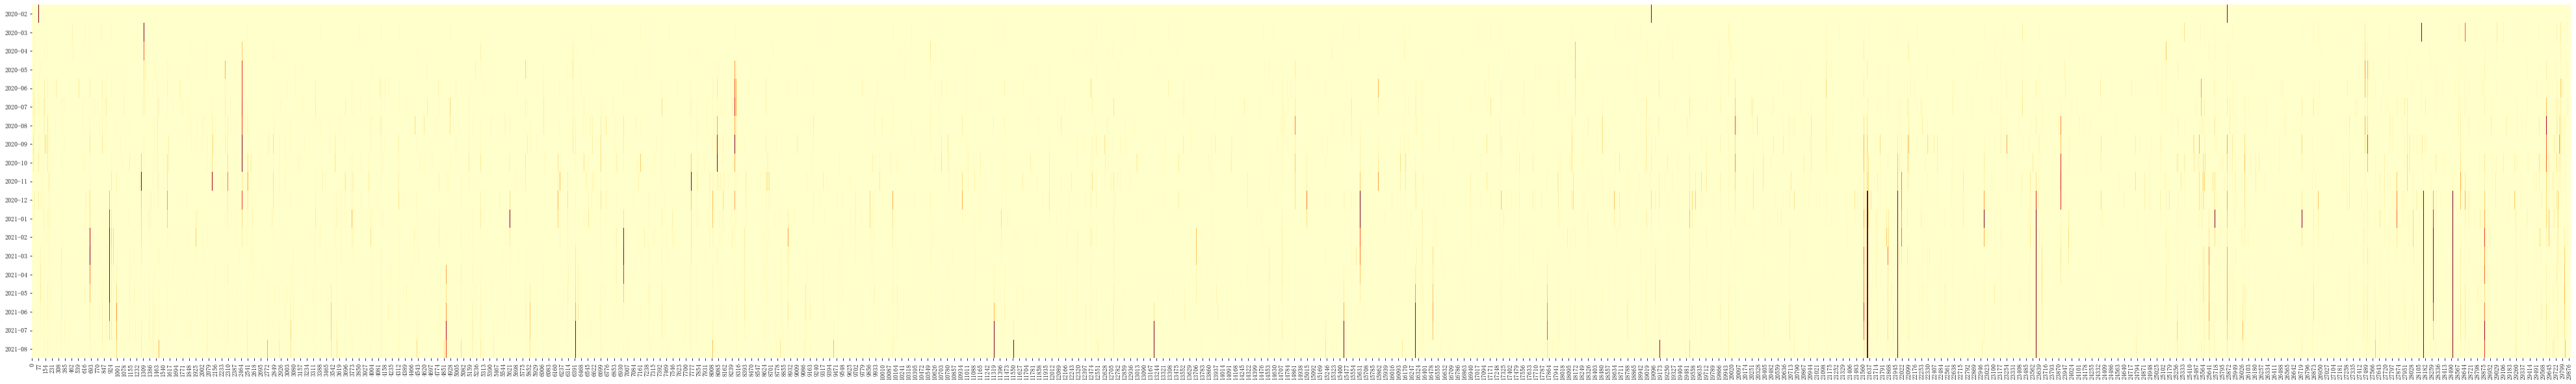

In [6]:
draw_months = months
draw_heatmap_data = heatmap_data
plt.figure(figsize=(70,10))
ax = sns.heatmap(draw_heatmap_data, cmap="YlOrRd", yticklabels=draw_months, vmin=0,vmax=0.05, cbar=False)

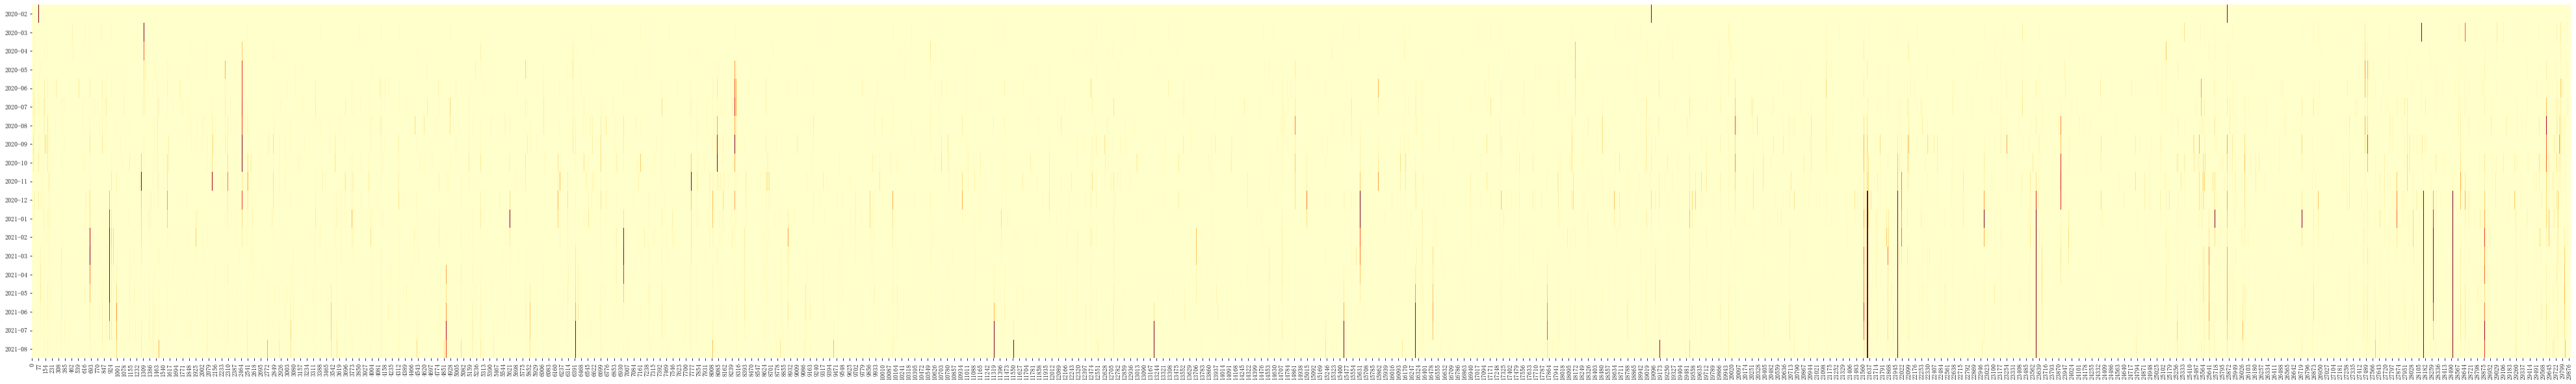

In [7]:
draw_months = months
draw_heatmap_data = heatmap_data
plt.figure(figsize=(70,10))
ax = sns.heatmap(draw_heatmap_data, cmap="YlOrRd", yticklabels=draw_months, vmin=0,vmax=0.05, cbar=False)

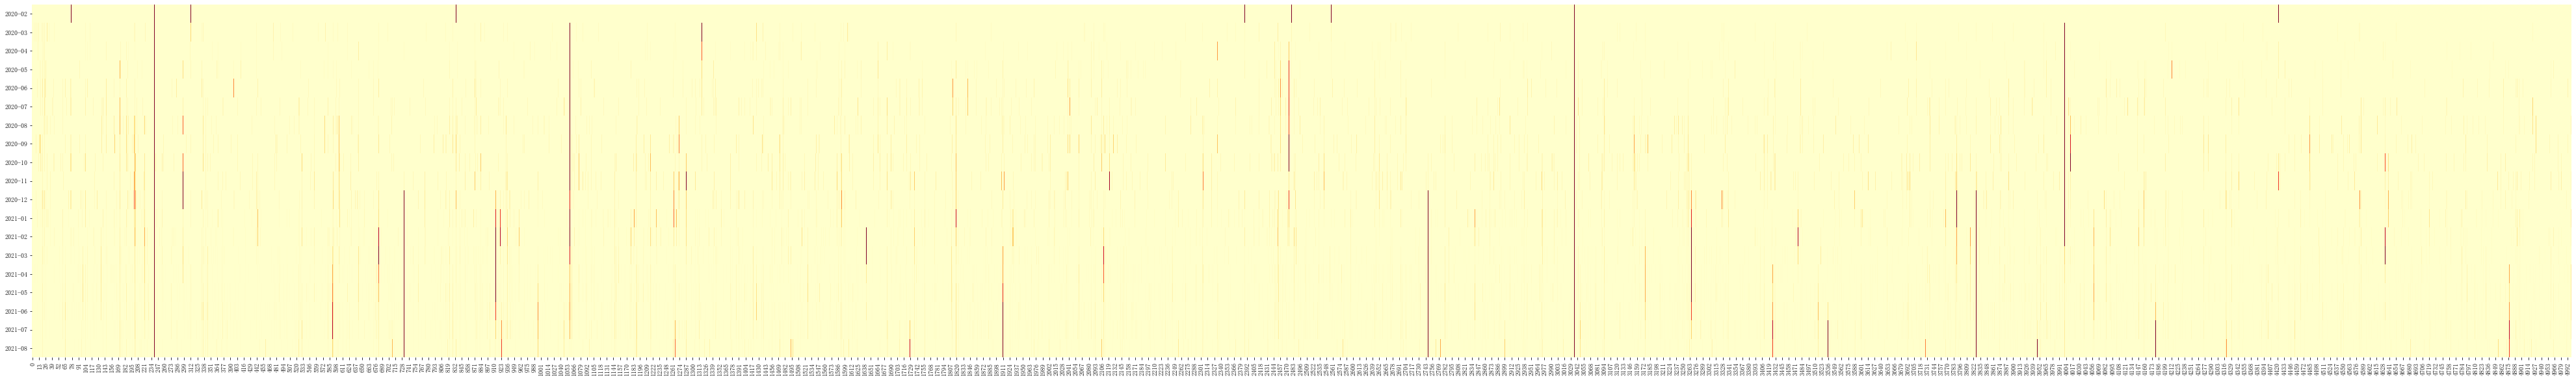

In [43]:
draw_months = months
draw_heatmap_data = heatmap_data[:,:5000]
plt.figure(figsize=(70,10))
ax = sns.heatmap(draw_heatmap_data, cmap="YlOrRd", yticklabels=draw_months, vmin=0,vmax=0.05, cbar=False)

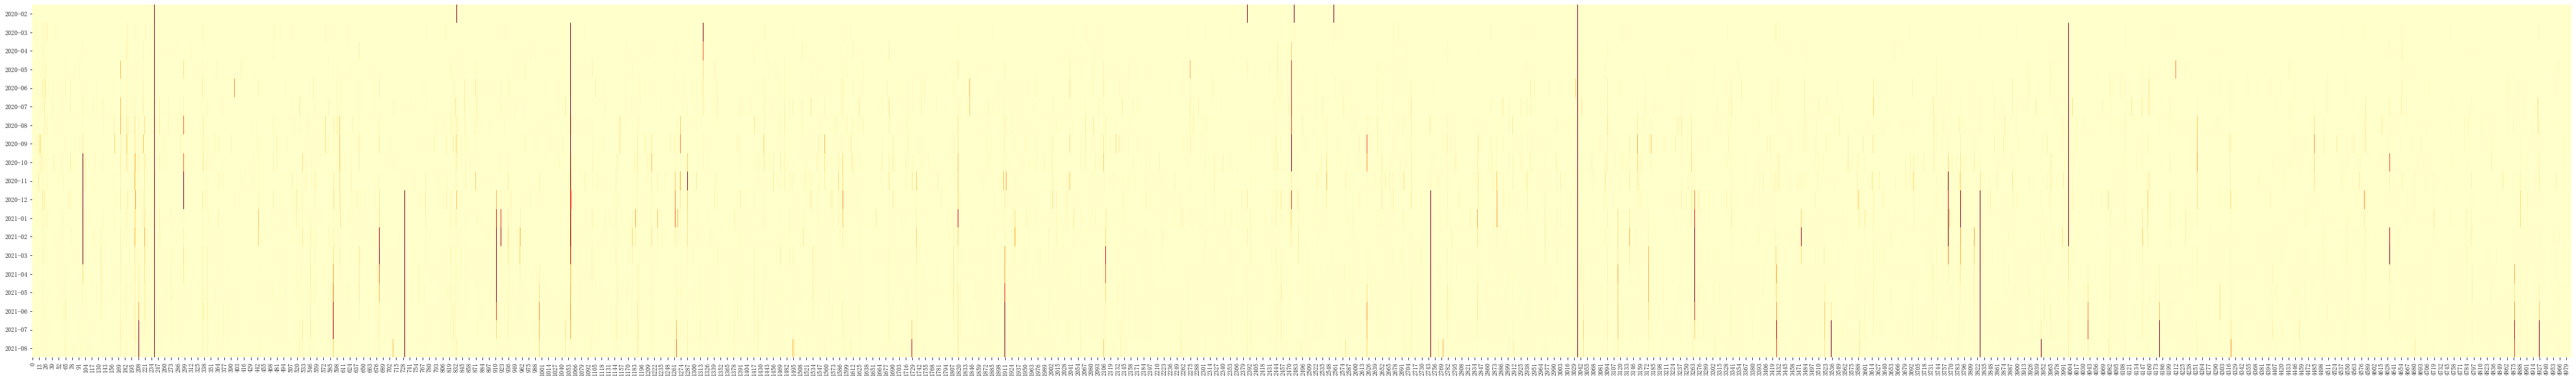

In [44]:
draw_months = months
draw_heatmap_data = heatmap_data[:,:4990]
plt.figure(figsize=(70,10))
ax = sns.heatmap(draw_heatmap_data, cmap="YlOrRd", yticklabels=draw_months, vmin=0,vmax=0.05, cbar=False)

In [12]:
len(draw_heatmap_data[0])

29903

In [33]:
matrix = np.array(draw_heatmap_data)
print(matrix[:, matrix.sum(0)>0].shape)
matrix = matrix[:, matrix.sum(0)>0]

(19, 16514)


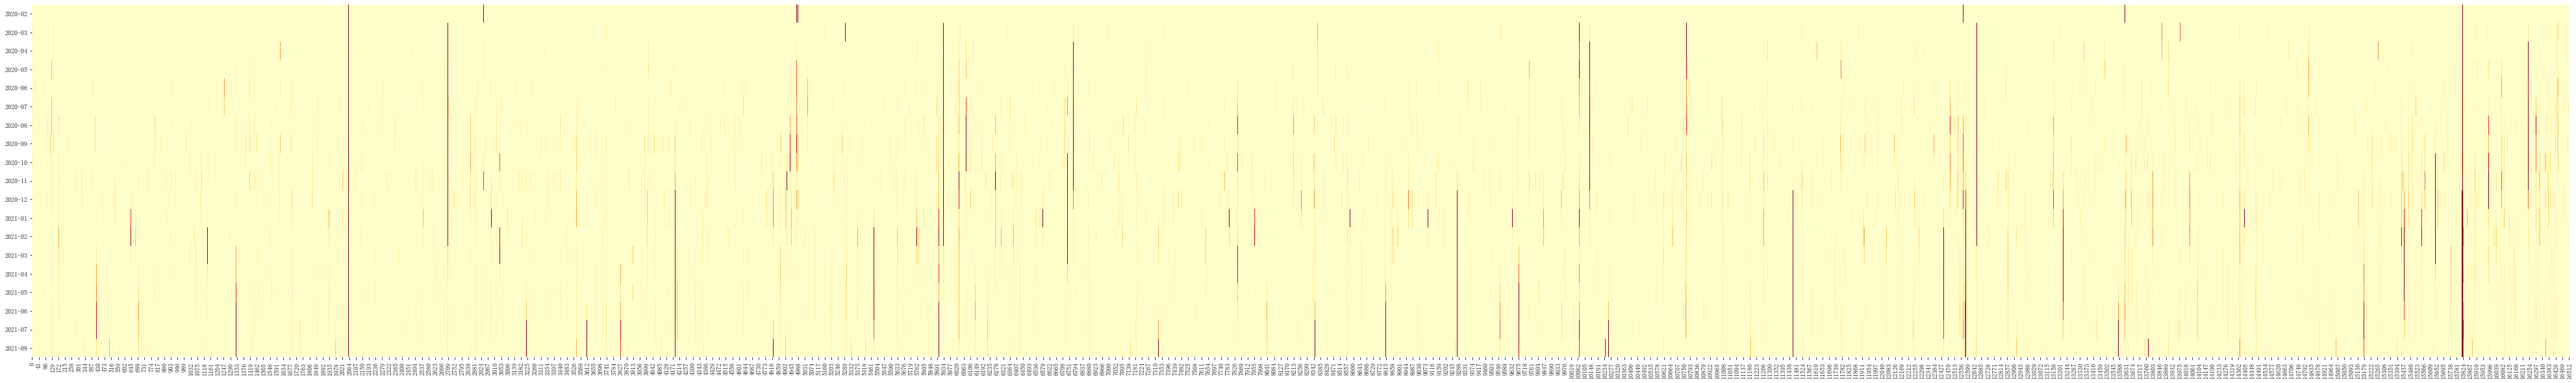

In [34]:
draw_months = months
draw_heatmap_data = matrix
plt.figure(figsize=(70,10))
ax = sns.heatmap(draw_heatmap_data, cmap="YlOrRd", yticklabels=draw_months, vmin=0,vmax=0.05, cbar=False)

In [38]:
#ax.set_xticklabels(labels=genome_length, fontsize=16, fontproperties=en_font)
#ax.set_yticklabels(labels=months, fontsize=16, fontproperties=en_font)
ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False, labelsize=16)
plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

cb=ax.figure.colorbar(ax.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=16) #设置colorbar刻度字体大小

plt.savefig(
    "test.png", bbox_inches="tight")
plt.close()

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches
from tqdm import tqdm
import matplotlib as mpl
import os
import seaborn as sns
from collections import defaultdict
from matplotlib.font_manager import FontProperties

continent_month_files = "../../data/input/continent_month_split/"
scatter_figures_output = "../../data/output/plots/scatter_figures/"
bounds_file_path = "../../data/input/genome_list.tsv"

def get_en_font():
    font = FontProperties()
    font.set_family('serif')
    font.set_name('Times New Roman')
    return font

en_font = get_en_font()

# 设置图表正常显示中文
plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams["font.style"] = "normal"
plt.rcParams["axes.unicode_minus"]=False

print("read data from genome_list.tsv")
data = pd.read_csv(bounds_file_path, sep="\t", header=None,names=['id', 'proteinName', 'gene', 'index'])
bounds = [1]
legend_labels = ["orf1a (266..13468)","orf1b (13468..21555)"]
labels = ["5'UTR","orf1a","orf1b","NCR"]
for row_index, row in data.iterrows():
    if row["gene"] == "orf1ab":
        temp = row["index"].split(",")
        for item in temp:
            index_list = item.split("..")
            for index in index_list:
                if int(index) not in bounds:
                    bounds.append(int(index))
    else:
        legend_labels.append(row["gene"] + " (" + row["index"] + ")")
        labels.append(row["gene"])
        if row["gene"] == "ORF10":
            labels.append("3'UTR")
        else:
            labels.append("NCR")
        temp = row["index"].split("..")
        for item in temp:
            if int(item) not in bounds:
                bounds.append(int(item))
bounds.append(29903)
colors = ['white', '#63b2ee','#76da91','white','#f8cb7f','white','#f89588','white','#7cd6cf','white','#9192ab','white','#7898e1','white', '#efa666', 'white','#eddd86','white','#9987ce','white', '#63b2ee', 'white']
legend_colors = [c for c in colors if c != "white"]
print(bounds,len(bounds), labels, len(labels), len(legend_colors))

# 对colorbar进行切割
bounds_1 = bounds[0:2]
bounds_1.append(10000)
colors_1 = colors[0:2]
bounds_2 = [1]
bounds_2.append(bounds[2]-10000)
bounds_2.append(10000)
colors_2 = colors[1:3]

print("reading data grouped by month and continent")
# 声明一个dict类型的空dict
continent_month_dict = defaultdict(lambda : {})
# 声明heatmap的横轴数组(29903bp)
genome_length = [i+1 for i in range(29903)]

splits = os.listdir(continent_month_files)
for split in tqdm(splits):
    print(split)
    # 获取文件名的大洲与月份
    continent, month = split.split(".")[0].split("-")
    month = month[0:4] + "-" + month[4:]
    # 读取文件数据
    data = pd.read_csv(continent_month_files + split, sep="\t")
    # # 将position的类型改为str
    # data["Position"] = data["Position"].astype(str)
    # 计算当月的样本数
    sample_num = len(data["Id"].unique())
    # 计算各个位点的出现个数并按照位点次序排序
    pos_series = data["Position"].value_counts().sort_index()
    # 判断是否存在position=0，如果有就删除该行
    keys = pos_series.keys()
    if 0 in keys:
        pos_series = pos_series.drop(0)
    # print(pos_series)
    pos_fre_series = pos_series / sample_num
    pos_indexs = list(pos_fre_series.keys())
    fre_res = []
    for i in genome_length:
        if i in pos_indexs:
            fre_res.append(round(pos_fre_series[i],2))
        else:
            fre_res.append(0)
    continent_month_dict[continent][month] = list(fre_res)

for continent in tqdm(continent_month_dict):
    print(continent)
    months = []
    heatmap_data = []
    sorted_continent_dict = sorted(continent_month_dict[continent].items(), key=lambda x: x[0]) 
    for month_data in sorted_continent_dict:
        print(month_data[0])
        month = month_data[0]
        months.append(month)
        heatmap_data.append(list(month_data[1]))
        print(len(month_data[1]))
        # months.append(month)
        # 进行热点图作图
    print("Start drawing")
    heatmap_data = np.array(heatmap_data)
    heatmap_data1 = np.array(heatmap_data[:,0:5000])
    heatmap_data2 = np.array(heatmap_data[:,5000:10000])
    heatmap_data3 = np.array(heatmap_data[:,10000:15000])
    heatmap_data4 = np.array(heatmap_data[:,15000:20000])
    heatmap_data5 = np.array(heatmap_data[:,20000:25000])
    heatmap_data6 = np.array(heatmap_data[:,25000:])

    heatmap_data_dict = {
    0:heatmap_data1,
    1:heatmap_data2,
    2:heatmap_data3,
    3:heatmap_data4,
    4:heatmap_data5,
    5:heatmap_data6,
}

    for i in range(6):
        plt.figure(figsize=(45,10))
        grid = plt.GridSpec(10, 45, hspace=0.8, right = 0.8)
        plt.subplot(grid[0:9,0:44])
        ax = sns.heatmap(heatmap_data_dict[i], cmap="PuRd", yticklabels=months, vmin=0,vmax=0.05, cbar=False)
        plt.xticks(ticks = [1,1000, 2000, 3000, 4000,5000],labels=[1+i*5000,1000+i*5000, 2000+i*5000, 3000+i*5000, 4000+i*5000,(1+i)*5000]) 
        ax.set_xticklabels(labels=[1+i*5000,1000+i*5000, 2000+i*5000, 3000+i*5000, 4000+i*5000,(1+i)*5000],fontsize=32, fontproperties=en_font)
        ax.set_yticklabels(labels=months, fontsize=32, fontproperties=en_font)
        ax.tick_params(top=True, bottom=False,
                       labeltop=True, labelbottom=False, labelsize=32)
        plt.setp(ax.get_xticklabels(), rotation=-0, ha="right",
                 rotation_mode="anchor")
        plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
                 rotation_mode="anchor")
        ax = plt.subplot(grid[0:9, 44:])
        # cb=ax.figure.colorbar(ax.collections[0]) #显示colorbar
        # cb.ax.tick_params(labelsize=32) #设置colorbar刻度字体大小
        norm = mpl.colors.Normalize(vmin=0, vmax=0.05)
        cb = plt.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap="PuRd"),
            cax=ax,
            ticks=[0,0.01, 0.02, 0.03, 0.04,0.05]
        )
        cb.ax.tick_params(labelsize=32)
        plt.savefig(
        scatter_figures_output + "mutation_region-{}-{}.png".format(continent, i+1), bbox_inches="tight",dpi=500)
        plt.close()


    # plt.figure(figsize=(45,10))
    # grid = plt.GridSpec(10, 45, hspace=0.8, right = 0.8)
    # plt.subplot(grid[0:9,0:44])
    # ax = sns.heatmap(heatmap_data1, cmap="PuRd", yticklabels=months, vmin=0,vmax=0.05, cbar=False)
    # # plt.xticks(ticks = [1,2500, 5000, 7500, 10000],labels=[1,2500, 5000, 7500, 10000]) 
    # plt.xticks(ticks = [1,500, 1000, 1500, 2000,2500, 5000],labels=[1,500, 1000, 1500, 2000,2500, 5000]) 
    # ax.set_xticklabels(labels=[1,500, 1000, 1500, 2000,2500, 5000],fontsize=32, fontproperties=en_font)
    # ax.set_yticklabels(labels=months, fontsize=32, fontproperties=en_font)
    # ax.tick_params(top=True, bottom=False,
    #                labeltop=True, labelbottom=False, labelsize=32)
    # plt.setp(ax.get_xticklabels(), rotation=-0, ha="right",
    #          rotation_mode="anchor")
    # plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
    #          rotation_mode="anchor")
    
    # ax = plt.subplot(grid[0:9, 44:])
    # # cb=ax.figure.colorbar(ax.collections[0]) #显示colorbar
    # # cb.ax.tick_params(labelsize=32) #设置colorbar刻度字体大小
    # norm = mpl.colors.Normalize(vmin=0, vmax=0.05)
    # cb = plt.colorbar(
    #     mpl.cm.ScalarMappable(norm=norm, cmap="PuRd"),
    #     cax=ax,
    #     ticks=[0,0.01, 0.02, 0.03, 0.04,0.05]
    # )
    # cb.ax.tick_params(labelsize=32)
    
    # ax = plt.subplot(grid[9,0:44])
    # cmap = mpl.colors.ListedColormap(colors_1)
    # norm = mpl.colors.BoundaryNorm(bounds_1, cmap.N)
    # cbar = plt.colorbar(
    #     mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    #     cax=ax,
    #     ticks=[241, 266, 3037, 10000],
    #     spacing='proportional',
    #     orientation='horizontal',
    # )
    # cbar.outline.set_visible(False)
    # cbar.ax.tick_params(labelsize=32)

    # plt.savefig(
    #     scatter_figures_output + "mutation_region-{}-1.png".format(continent), bbox_inches="tight")
    # plt.close()

    # # plt.figure(figsize=(45,10))
    # grid = plt.GridSpec(10, 45, hspace=0.8, right = 0.8)
    # plt.subplot(grid[0:9,0:44])
    # ax = sns.heatmap(heatmap_data2, cmap="PuRd", yticklabels=months, vmin=0,vmax=0.05, cbar=False)
    # plt.xticks(ticks = [1,2500, 5000, 7500, 10000],labels=[10001,12500, 15000, 17500, 20000]) 
    # ax.set_xticklabels(labels=[10001,12500, 15000, 17500, 20000],fontsize=32, fontproperties=en_font)
    # ax.set_yticklabels(labels=months, fontsize=32, fontproperties=en_font)
    # ax.tick_params(top=True, bottom=False,
    #                labeltop=True, labelbottom=False, labelsize=32)
    # plt.setp(ax.get_xticklabels(), rotation=-0, ha="right",
    #          rotation_mode="anchor")
    # plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
    #          rotation_mode="anchor")
    
    # ax = plt.subplot(grid[0:9, 44:])
    # # cb=ax.figure.colorbar(ax.collections[0]) #显示colorbar
    # # cb.ax.tick_params(labelsize=32) #设置colorbar刻度字体大小
    # norm = mpl.colors.Normalize(vmin=0, vmax=0.05)
    # cb = plt.colorbar(
    #     mpl.cm.ScalarMappable(norm=norm, cmap="PuRd"),
    #     cax=ax,
    #     ticks=[0,0.01, 0.02, 0.03, 0.04,0.05]
    # )
    # cb.ax.tick_params(labelsize=32)
    
    # ax = plt.subplot(grid[9,0:44])
    # cmap = mpl.colors.ListedColormap(colors_2)
    # norm = mpl.colors.BoundaryNorm(bounds_2, cmap.N)
    # cbar = plt.colorbar(
    #     mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    #     cax=ax,
    #     ticks=[3468, 4408, 10000],
    #     label=[13468, 14408, 20000],
    #     spacing='proportional',
    #     orientation='horizontal',
    # )
    # cbar.outline.set_visible(False)
    # cbar.ax.tick_params(labelsize=32)

    # plt.savefig(
    #     scatter_figures_output + "mutation_region-{}-2.png".format(continent), bbox_inches="tight")
    # plt.close()


    # plt.figure(figsize=(45,9))
    # ax = sns.heatmap(heatmap_data2, cmap="PuRd", yticklabels=months, vmin=0,vmax=0.05, cbar=False)
    # plt.xticks(ticks = [1,2500, 5000, 7500, 9903],labels=[20001,22500, 25000, 27500, 29903]) 
    # ax.set_xticklabels(labels=[20001,22500, 25000, 27500, 29903],fontsize=32, fontproperties=en_font)
    # ax.set_yticklabels(labels=months, fontsize=32, fontproperties=en_font)
    # ax.tick_params(top=True, bottom=False,
    #                labeltop=True, labelbottom=False, labelsize=32)
    # plt.setp(ax.get_xticklabels(), rotation=-0, ha="right",
    #          rotation_mode="anchor")
    # plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
    #          rotation_mode="anchor")
    # cb=ax.figure.colorbar(ax.collections[0]) #显示colorbar
    # cb.ax.tick_params(labelsize=32) #设置colorbar刻度字体大小
    # plt.savefig(
    #     scatter_figures_output + "mutation_region-{}-3.png".format(continent), bbox_inches="tight")
    # plt.close()

read data from genome_list.tsv
[1, 266, 13468, 21555, 21563, 25384, 25393, 26220, 26245, 26472, 26523, 27191, 27202, 27387, 27394, 27759, 27894, 28259, 28274, 29533, 29558, 29674, 29903] 23 ["5'UTR", 'orf1a', 'orf1b', 'NCR', 'S', 'NCR', 'ORF3a', 'NCR', 'E', 'NCR', 'M', 'NCR', 'ORF6', 'NCR', 'ORF7a', 'NCR', 'ORF8', 'NCR', 'N', 'NCR', 'ORF10', "3'UTR"] 22 11
reading data grouped by month and continent


  1%|█▋                                                                                                                                                                                                    | 1/118 [00:00<00:20,  5.74it/s]

South America-202004.tsv
Europe-202107.tsv


  2%|███▎                                                                                                                                                                                                  | 2/118 [00:04<04:45,  2.46s/it]

South America-202104.tsv


  3%|█████                                                                                                                                                                                                 | 3/118 [00:05<03:27,  1.80s/it]

Europe-202003.tsv


  3%|██████▋                                                                                                                                                                                               | 4/118 [00:06<02:40,  1.41s/it]

North America-202004.tsv


  4%|████████▍                                                                                                                                                                                             | 5/118 [00:06<02:12,  1.17s/it]

South America-202010.tsv


  6%|███████████▋                                                                                                                                                                                          | 7/118 [00:07<01:11,  1.56it/s]

Africa-202102.tsv
South America-202003.tsv


  7%|█████████████▍                                                                                                                                                                                        | 8/118 [00:07<00:51,  2.12it/s]

Oceania-202007.tsv


  8%|███████████████                                                                                                                                                                                       | 9/118 [00:07<00:43,  2.51it/s]

Asia-202007.tsv


  8%|████████████████▋                                                                                                                                                                                    | 10/118 [00:08<00:46,  2.30it/s]

North America-202007.tsv


  9%|██████████████████▎                                                                                                                                                                                  | 11/118 [00:09<01:01,  1.75it/s]

Asia-202105.tsv


 10%|████████████████████                                                                                                                                                                                 | 12/118 [00:10<01:30,  1.17it/s]

Asia-202011.tsv


 11%|█████████████████████▋                                                                                                                                                                               | 13/118 [00:11<01:24,  1.24it/s]

Asia-202006.tsv


 12%|███████████████████████▎                                                                                                                                                                             | 14/118 [00:11<01:13,  1.42it/s]

North America-202104.tsv


 13%|█████████████████████████                                                                                                                                                                            | 15/118 [00:15<02:37,  1.53s/it]

South America-202103.tsv


 14%|██████████████████████████▋                                                                                                                                                                          | 16/118 [00:15<02:08,  1.26s/it]

Europe-202007.tsv


 14%|████████████████████████████▍                                                                                                                                                                        | 17/118 [00:16<01:45,  1.05s/it]

South America-202002.tsv
North America-202108.tsv


 16%|███████████████████████████████▋                                                                                                                                                                     | 19/118 [00:20<02:24,  1.46s/it]

Asia-202009.tsv


 19%|████████████████████████████████████▋                                                                                                                                                                | 22/118 [00:20<01:12,  1.33it/s]

Oceania-202102.tsv
Europe-202002.tsv
Europe-202004.tsv


 19%|██████████████████████████████████████▍                                                                                                                                                              | 23/118 [00:21<01:15,  1.26it/s]

Europe-202012.tsv


 20%|████████████████████████████████████████                                                                                                                                                             | 24/118 [00:23<01:45,  1.13s/it]

Africa-202002.tsv
North America-202003.tsv


 23%|█████████████████████████████████████████████                                                                                                                                                        | 27/118 [00:24<00:58,  1.55it/s]

Africa-202103.tsv
Europe-202009.tsv


 24%|██████████████████████████████████████████████▋                                                                                                                                                      | 28/118 [00:25<01:08,  1.31it/s]

Asia-202104.tsv


 25%|████████████████████████████████████████████████▍                                                                                                                                                    | 29/118 [00:27<01:24,  1.05it/s]

Oceania-202106.tsv
North America-202103.tsv


 27%|█████████████████████████████████████████████████████▍                                                                                                                                               | 32/118 [00:30<01:14,  1.15it/s]

Oceania-202009.tsv
Asia-202101.tsv


 28%|███████████████████████████████████████████████████████                                                                                                                                              | 33/118 [00:31<01:20,  1.06it/s]

South America-202102.tsv


 30%|██████████████████████████████████████████████████████████▍                                                                                                                                          | 35/118 [00:31<00:51,  1.60it/s]

Africa-202006.tsv
South America-202005.tsv


 31%|████████████████████████████████████████████████████████████                                                                                                                                         | 36/118 [00:32<00:41,  1.99it/s]

Asia-202102.tsv


 32%|███████████████████████████████████████████████████████████████▍                                                                                                                                     | 38/118 [00:33<00:40,  1.98it/s]

Africa-202008.tsv
Asia-202005.tsv


 33%|█████████████████████████████████████████████████████████████████                                                                                                                                    | 39/118 [00:33<00:39,  2.01it/s]

North America-202106.tsv


 35%|████████████████████████████████████████████████████████████████████▍                                                                                                                                | 41/118 [00:35<00:56,  1.36it/s]

Africa-202009.tsv
Europe-202101.tsv


 36%|██████████████████████████████████████████████████████████████████████                                                                                                                               | 42/118 [00:38<01:45,  1.39s/it]

Africa-202105.tsv


 38%|███████████████████████████████████████████████████████████████████████████▏                                                                                                                         | 45/118 [00:39<00:44,  1.66it/s]

Africa-202004.tsv
Oceania-202010.tsv
North America-202012.tsv


 39%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                        | 46/118 [00:40<01:01,  1.17it/s]

Africa-202007.tsv


 42%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                                                   | 49/118 [00:41<00:30,  2.30it/s]

Oceania-202006.tsv
Oceania-202011.tsv
Oceania-202108.tsv


 42%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                                                 | 50/118 [00:41<00:24,  2.74it/s]

Asia-202012.tsv


 44%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                                                              | 52/118 [00:42<00:26,  2.46it/s]

Asia-202002.tsv
Africa-202003.tsv
Oceania-202012.tsv


 46%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                          | 54/118 [00:42<00:17,  3.72it/s]

Europe-202103.tsv


 47%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                         | 55/118 [00:46<01:15,  1.19s/it]

Africa-202012.tsv


 48%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                     | 57/118 [00:47<00:46,  1.32it/s]

Oceania-202104.tsv
Africa-202108.tsv


 49%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                    | 58/118 [00:47<00:36,  1.65it/s]

North America-202001.tsv
Oceania-202001.tsv
North America-202101.tsv


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 61/118 [00:49<00:38,  1.50it/s]

Asia-202010.tsv


 53%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 62/118 [00:50<00:35,  1.57it/s]

Asia-202107.tsv


 53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 63/118 [00:51<00:43,  1.25it/s]

South America-202009.tsv


 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 64/118 [00:51<00:35,  1.50it/s]

Europe-202011.tsv


 55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 65/118 [00:53<00:52,  1.02it/s]

Europe-202006.tsv


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                      | 66/118 [00:54<00:46,  1.11it/s]

Asia-202004.tsv


 57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 67/118 [00:54<00:38,  1.32it/s]

North America-202002.tsv
Africa-202101.tsv


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 69/118 [00:55<00:24,  1.97it/s]

South America-202105.tsv


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 70/118 [00:56<00:30,  1.55it/s]

Europe-202105.tsv


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 72/118 [01:00<00:48,  1.06s/it]

Oceania-202101.tsv
North America-202107.tsv


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 73/118 [01:03<01:12,  1.61s/it]

Oceania-202002.tsv
South America-202106.tsv


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 75/118 [01:04<00:49,  1.15s/it]

Africa-202107.tsv


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 76/118 [01:04<00:39,  1.06it/s]

North America-202006.tsv


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 77/118 [01:05<00:36,  1.11it/s]

North America-202008.tsv


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 79/118 [01:06<00:26,  1.48it/s]

Oceania-202103.tsv
Africa-202010.tsv


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 83/118 [01:06<00:09,  3.86it/s]

Asia-202001.tsv
Europe-202001.tsv
Oceania-202005.tsv
South America-202108.tsv
Asia-202106.tsv


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 85/118 [01:08<00:18,  1.80it/s]

North America-202009.tsv


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 86/118 [01:09<00:19,  1.67it/s]

North America-202105.tsv


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 87/118 [01:12<00:32,  1.06s/it]

North America-202010.tsv


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 88/118 [01:13<00:31,  1.05s/it]

Europe-202008.tsv


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 89/118 [01:14<00:28,  1.01it/s]

Asia-202003.tsv


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 90/118 [01:14<00:22,  1.26it/s]

South America-202006.tsv


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 91/118 [01:14<00:17,  1.58it/s]

Europe-202104.tsv


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 92/118 [01:18<00:39,  1.53s/it]

North America-202005.tsv


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 93/118 [01:19<00:32,  1.29s/it]

South America-202107.tsv


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 94/118 [01:20<00:29,  1.23s/it]

North America-202011.tsv


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 95/118 [01:21<00:29,  1.27s/it]

Europe-202010.tsv


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 97/118 [01:23<00:21,  1.01s/it]

Oceania-202003.tsv
Europe-202005.tsv


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 99/118 [01:24<00:13,  1.46it/s]

Africa-202011.tsv
Asia-202108.tsv


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 100/118 [01:25<00:17,  1.00it/s]

Africa-202104.tsv


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 101/118 [01:26<00:13,  1.30it/s]

South America-202101.tsv


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 102/118 [01:26<00:10,  1.47it/s]

Asia-202103.tsv


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 103/118 [01:27<00:11,  1.31it/s]

North America-202102.tsv


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 104/118 [01:29<00:16,  1.19s/it]

Europe-202106.tsv


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 107/118 [01:32<00:10,  1.00it/s]

Oceania-202105.tsv
Oceania-202004.tsv
South America-202008.tsv


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 108/118 [01:33<00:08,  1.21it/s]

Europe-202102.tsv


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 109/118 [01:36<00:13,  1.47s/it]

Europe-202108.tsv


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 111/118 [01:41<00:12,  1.83s/it]

Africa-202005.tsv
South America-202012.tsv


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 112/118 [01:42<00:08,  1.41s/it]

South America-202007.tsv


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 114/118 [01:42<00:03,  1.23it/s]

Oceania-202008.tsv
Oceania-202107.tsv


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 115/118 [01:42<00:01,  1.65it/s]

South America-202011.tsv


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 116/118 [01:43<00:01,  1.97it/s]

Asia-202008.tsv


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 117/118 [01:43<00:00,  1.93it/s]

Africa-202106.tsv


  0%|                                                                                                                                                                                                                | 0/6 [00:00<?, ?it/s]

South America
2020-02
29903
2020-03
29903
2020-04
29903
2020-05
29903
2020-06
29903
2020-07
29903
2020-08
29903
2020-09
29903
2020-10
29903
2020-11
29903
2020-12
29903
2021-01
29903
2021-02
29903
2021-03
29903
2021-04
29903
2021-05
29903
2021-06
29903
2021-07
29903
2021-08
29903
Start drawing


 17%|█████████████████████████████████▎                                                                                                                                                                      | 1/6 [00:17<01:26, 17.29s/it]

Europe
2020-01
29903
2020-02
29903
2020-03
29903
2020-04
29903
2020-05
29903
2020-06
29903
2020-07
29903
2020-08
29903
2020-09
29903
2020-10
29903
2020-11
29903
2020-12
29903
2021-01
29903
2021-02
29903
2021-03
29903
2021-04
29903
2021-05
29903
2021-06
29903
2021-07
29903
2021-08
29903
Start drawing


 33%|██████████████████████████████████████████████████████████████████▋                                                                                                                                     | 2/6 [00:34<01:08, 17.25s/it]

North America
2020-01
29903
2020-02
29903
2020-03
29903
2020-04
29903
2020-05
29903
2020-06
29903
2020-07
29903
2020-08
29903
2020-09
29903
2020-10
29903
2020-11
29903
2020-12
29903
2021-01
29903
2021-02
29903
2021-03
29903
2021-04
29903
2021-05
29903
2021-06
29903
2021-07
29903
2021-08
29903
Start drawing


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                    | 3/6 [00:51<00:51, 17.23s/it]

Africa
2020-02
29903
2020-03
29903
2020-04
29903
2020-05
29903
2020-06
29903
2020-07
29903
2020-08
29903
2020-09
29903
2020-10
29903
2020-11
29903
2020-12
29903
2021-01
29903
2021-02
29903
2021-03
29903
2021-04
29903
2021-05
29903
2021-06
29903
2021-07
29903
2021-08
29903
Start drawing


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 4/6 [01:08<00:34, 17.17s/it]

Oceania
2020-01
29903
2020-02
29903
2020-03
29903
2020-04
29903
2020-05
29903
2020-06
29903
2020-07
29903
2020-08
29903
2020-09
29903
2020-10
29903
2020-11
29903
2020-12
29903
2021-01
29903
2021-02
29903
2021-03
29903
2021-04
29903
2021-05
29903
2021-06
29903
2021-07
29903
2021-08
29903
Start drawing


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 5/6 [01:26<00:17, 17.23s/it]

Asia
2020-01
29903
2020-02
29903
2020-03
29903
2020-04
29903
2020-05
29903
2020-06
29903
2020-07
29903
2020-08
29903
2020-09
29903
2020-10
29903
2020-11
29903
2020-12
29903
2021-01
29903
2021-02
29903
2021-03
29903
2021-04
29903
2021-05
29903
2021-06
29903
2021-07
29903
2021-08
29903
Start drawing


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:43<00:00, 17.26s/it]


In [52]:
print("done")

done


In [48]:
img = Image.open(scatter_figures_output + "mutation_region-{}-{}.png".format(continent, i+1))

In [49]:
img.size

(2378, 556)

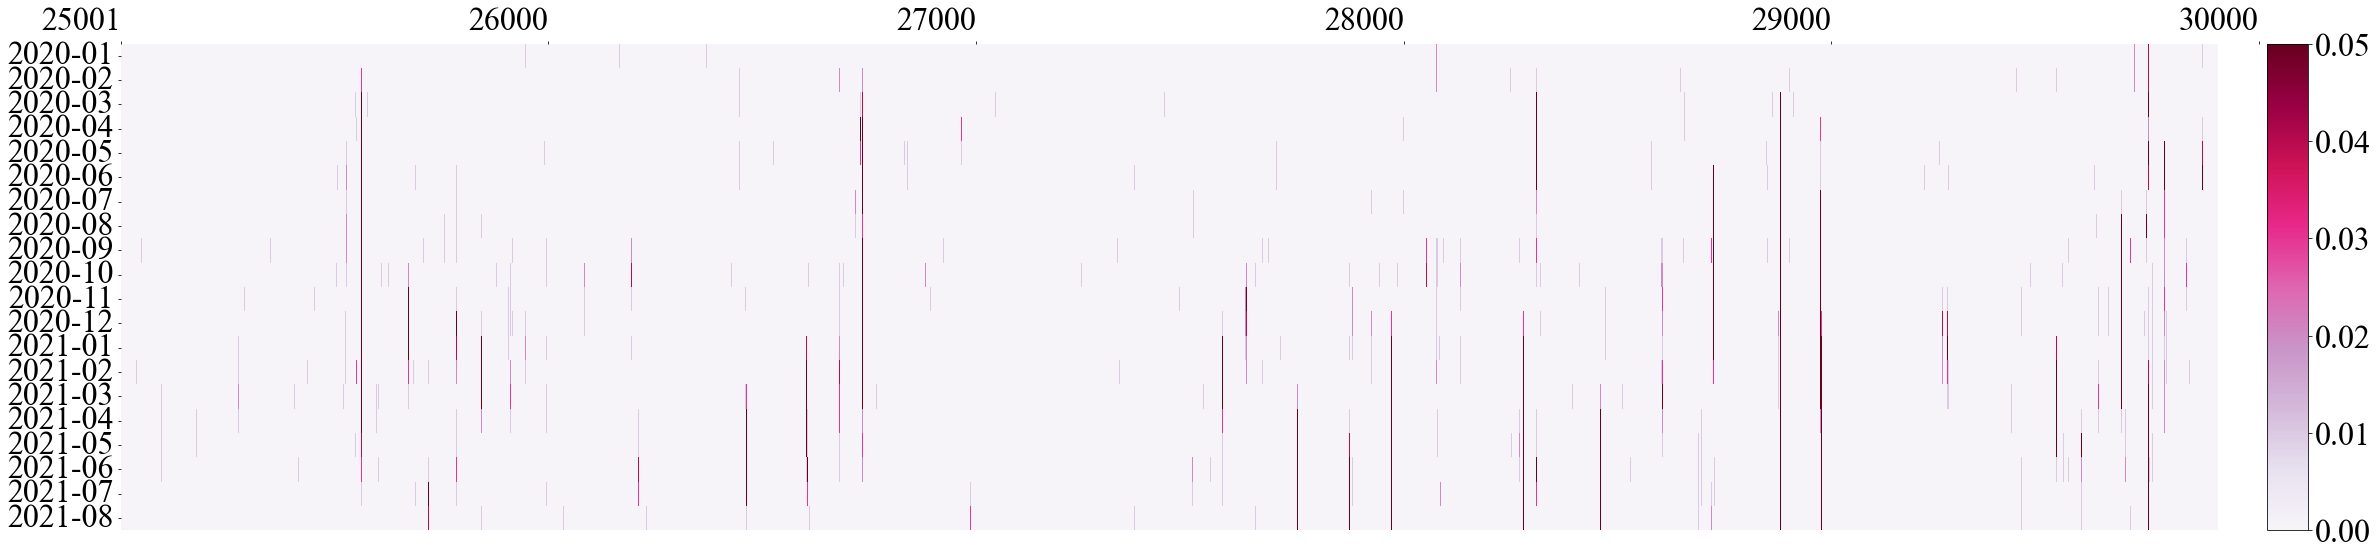

In [50]:
img